**AMERICAN SIGN LANGUAGE- RECOGNITION **

In [ ]:
import numpy as np
from keras.utils import np_utils, to_categorical
from keras.preprocessing import image
from os import listdir
from os.path import isdir, join
import random

def load_data(container_path='/content/drive/MyDrive/technocolabs', folders=['A/A', 'B/B', 'C/C'],
              size=3000, test_split=0.2, seed=0):

    """
    Loads sign language dataset.
    """
    
    filenames, labels = [], []

    for label, folder in enumerate(folders):
        folder_path = join(container_path, folder)
        images = [join(folder_path, d)
                     for d in sorted(listdir(folder_path))]
        labels.extend(len(images) * [label])
        filenames.extend(images)
    
    random.seed(seed)
    data = list(zip(filenames, labels))
    random.shuffle(data)
    data = data[:size]
    filenames, labels = zip(*data)

    
    # Get the images
    x = paths_to_tensor(filenames).astype('float32')/255
    # Store the one-hot targets
    y = np.array(labels)

    x_train = np.array(x[:int(len(x) * (1 - test_split))])
    y_train = np.array(y[:int(len(x) * (1 - test_split))])
    x_test = np.array(x[int(len(x) * (1 - test_split)):])
    y_test = np.array(y[int(len(x) * (1 - test_split)):])
    np.save("x_train",x_train)
    np.save("y_train",y_train)
    np.save("x_test",x_test)
    np.save("y_test",y_test)

    print("Arrays saved to disk")


    #return (x_train, y_train), (x_test, y_test)


def path_to_tensor(img_path, size):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(size, size))
    # convert PIL.Image.Image type to 3D tensor
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor 
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths, size=50):
    list_of_tensors = [path_to_tensor(img_path, size) for img_path in img_paths]
    return np.vstack(list_of_tensors)


load_data()

Arrays saved to disk


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt  
import matplotlib.image as mpimg
from keras.preprocessing.image import load_img,img_to_array,array_to_img
from PIL import Image

In [ ]:
x_train = np.load('x_train.npy')
x_test = np.load('x_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [ ]:
print("X_train :",x_train.shape)
print("y_train :",y_train.shape)

X_train : (2400, 50, 50, 3)
y_train : (2400,)


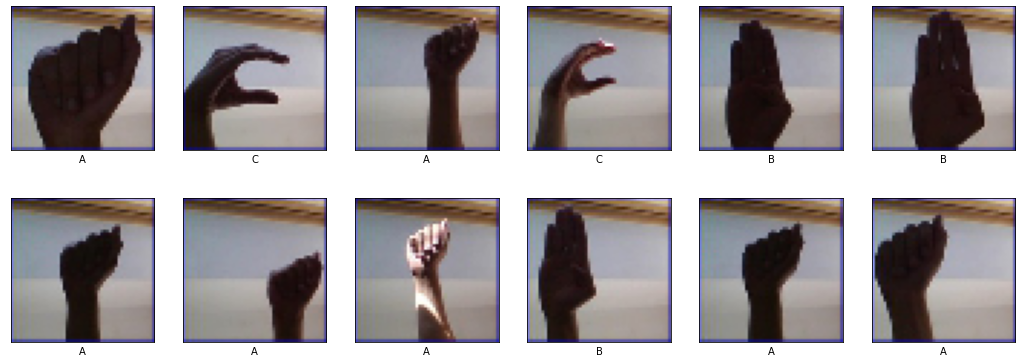

In [ ]:
labels={0:'A', 1:'B', 2:'C'}
plt.figure(figsize=(18,10))

for i in range(12):
  random_no=random.randint(0,x_train.shape[0])
  plt.subplot(3,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[random_no])
  plt.xlabel(labels[y_train[random_no]])
plt.show()


In [ ]:
num_A_train=0
num_B_train=0
num_C_train=0
for i in y_train:
    if(i==0):
        num_A_train = num_A_train + 1
    elif(i==1):
        num_B_train = num_B_train+1
    else:
        num_C_train = num_C_train+1


print("Training dataset:")
print("A: {} \nB: {} \nC: {}".format(num_A_train, num_B_train, num_C_train))
print("Number of enties in train set are",num_A_train+num_B_train+num_C_train)

Training dataset:
A: 795 
B: 811 
C: 794
Number of enties in train set are 2400


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


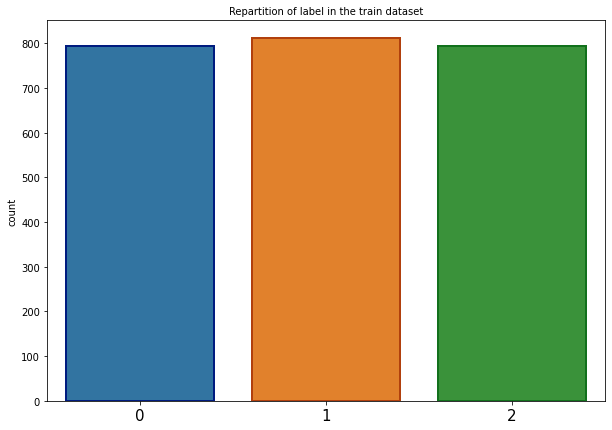

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,7))
plt.xticks(size=15)
sns.countplot(y_train,linewidth =2,edgecolor=sns.color_palette("dark"))
plt.title('Repartition of label in the train dataset', fontdict={'color' : 'Black' , 'fontsize' : 10})

plt.show()

In [ ]:
num_A_test=0
num_B_test=0
num_C_test=0
for i in y_test:
    if(i==0):
        num_A_test = num_A_test + 1
    elif(i==1):
        num_B_test = num_B_test+1
    else:
        num_C_test = num_C_test+1


print("Training dataset:")
print("A: {} \nB: {} \nC: {}".format(num_A_test, num_B_test, num_C_test))
print("Number of enties in test set are",num_A_test+num_B_test+num_C_test)

Training dataset:
A: 208 
B: 187 
C: 205
Number of enties in test set are 600


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


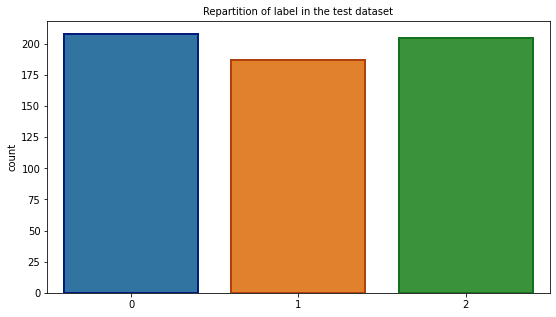

In [ ]:
import seaborn as sns
plt.figure(figsize = (9,5))
sns.countplot(y_test,linewidth =2,edgecolor=sns.color_palette("dark"))
plt.title('Repartition of label in the test dataset', fontdict={'color' : 'Black' , 'fontsize' : 10})

plt.show()

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
input_shape=(50,50,3)
model=Sequential()
model.add(Conv2D(28,kernel_size=(5,5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Conv2D(15,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 46, 46, 28)        2128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 28)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 15)        10515     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 183       
Total params: 12,826
Trainable params: 12,826
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=["accuracy"])

In [ ]:
fit=model.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.3) 

Epoch 1/5
53/53 [==============================] - 1s 9ms/step - loss: 0.9652 - accuracy: 0.5937 - val_loss: 0.5084 - val_accuracy: 0.7972
Epoch 2/5
53/53 [==============================] - 0s 5ms/step - loss: 0.3784 - accuracy: 0.8772 - val_loss: 0.1974 - val_accuracy: 0.9403
Epoch 3/5
53/53 [==============================] - 0s 5ms/step - loss: 0.1821 - accuracy: 0.9431 - val_loss: 0.1105 - val_accuracy: 0.9875
Epoch 4/5
53/53 [==============================] - 0s 5ms/step - loss: 0.1043 - accuracy: 0.9883 - val_loss: 0.0659 - val_accuracy: 0.9958
Epoch 5/5
53/53 [==============================] - 0s 5ms/step - loss: 0.0440 - accuracy: 0.9976 - val_loss: 0.0437 - val_accuracy: 0.9944


In [ ]:
model.evaluate(x_test,y_test)

19/19 [==============================] - 0s 4ms/step - loss: 0.0427 - accuracy: 0.9950


[0.04269473999738693, 0.9950000047683716]

Converting model into TFLite Model

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpa48hu5ka/assets


In [ ]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)